## 농산물 가격 예측 AI 경진대회 05. 모델링
### 05-1. 단변량 모델링
+ 단변량 RNN
+ 단변량 LSTM

### 00. 모듈 & 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import mean_squared_error

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
data = pd.read_csv('public_data/train.csv')
data.set_index('date',drop=True,inplace=True)
data.head()

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


### 01. 데이터 전처리 함수
+ 단변량 시계열 데이터셋 생성
+ 스케일링
+ train, test 분리

In [3]:
def make_dataset(data,algi,window_size,target_size):
    
    #분석할 농산물 선택
    data = data[data[algi]!=0.0]
    one = data[algi]
    
    #단변량 시계열 데이터셋 구성
    one = np.array(one)

    make = []
    for i in range(len(one)-window_size-target_size):
        make.append(one[i:i+window_size+target_size])

    make_set = pd.DataFrame(make)
    
    #스케일링
    Scaler = StandardScaler()
    Scaled = Scaler.fit_transform(make_set)
    print(Scaled.shape)
    
    #타겟 분리
    train = Scaled[:,:window_size]
    target = Scaled[:,window_size:]
    print(train.shape, target.shape)
    return train, target, make_set

### 02. modeling 함수

In [4]:
def model_RNN(algi):
    model = keras.models.Sequential([
        keras.layers.SimpleRNN(30,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[2])),
        keras.layers.SimpleRNN(30,return_sequences=True),
        keras.layers.SimpleRNN(30,return_sequences=True),
        keras.layers.SimpleRNN(30),
        keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer="adam")
    history = model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))
    model.summary()
    print(model.evaluate(x_test, y_test))
    
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('%s RNN residual'%algi)
    plt.show()
    
    y_pred = model.predict(x_test)

    
    return y_pred

In [5]:
def model_LSTM(algi):
    model = keras.models.Sequential([
        keras.layers.LSTM(30,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[2])),
        keras.layers.LSTM(30,return_sequences=True),
        keras.layers.LSTM(30,return_sequences=True),
        keras.layers.LSTM(30),
        keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer="adam")
    history = model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))
    model.summary()
    print(model.evaluate(x_test, y_test))
    
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('%s LSTM residual'%algi)
    plt.show()
    
    y_pred = model.predict(x_test)
    
    return y_pred

### 03. 그래프 비교 함수

In [6]:
def comapare_plot(y_test,y_RNN_pred,y_LSTM_pred):
    y_test = y_test*np.mean(np.std(make_dataset(data,algi,90,1)[2],axis=0))+np.mean(np.mean(make_dataset(data,algi,90,1)[2]))
    y_RNN_pred = y_RNN_pred*np.mean(np.std(make_dataset(data,algi,90,1)[2],axis=0))+np.mean(np.mean(make_dataset(data,algi,90,1)[2]))
    y_LSTM_pred = y_LSTM_pred*np.mean(np.std(make_dataset(data,algi,90,1)[2],axis=0))+np.mean(np.mean(make_dataset(data,algi,90,1)[2]))
    plt.plot(y_test,label='original')
    plt.plot(y_RNN_pred,label='RNN_predict')
    plt.plot(y_LSTM_pred,label='LSTM_predict')
    plt.title('compare %s precidtion'%algi)
    
    rmse = mean_squared_error(y_test,y_RNN_pred)
    print('RNN_RMSE : ',rmse)
    
    rmse = mean_squared_error(y_test,y_LSTM_pred)
    print('LSTM_RMSE : ',rmse)
    
    plt.legend()
    plt.show()

### 04. 결과 비교
#### 04-1. 배추 가격

In [7]:
algi = '배추_가격(원/kg)'
train = make_dataset(data,algi,90,1)[0]
target = make_dataset(data,algi,90,1)[1]

#train test 분리
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=False, random_state=120)
print('x_train.shape:',x_train.shape, 'x_train.shape:',y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:',y_test.shape)

#train test reshape
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print('x_train.shape:',x_train.shape, 'x_test.shape:',x_test.shape)

(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
x_train.shape: (1111, 90) x_train.shape: (1111, 1)
x_test.shape: (278, 90) y_test.shape: (278, 1)
x_train.shape: (1111, 90, 1) x_test.shape: (278, 90, 1)


Epoch 1/20
35/35 [==============================] - 7s 115ms/step - loss: 0.2273 - val_loss: 0.3473
Epoch 2/20
35/35 [==============================] - 3s 82ms/step - loss: 0.1272 - val_loss: 0.2913
Epoch 3/20
35/35 [==============================] - 4s 104ms/step - loss: 0.1098 - val_loss: 0.2921
Epoch 4/20
35/35 [==============================] - 3s 81ms/step - loss: 0.1048 - val_loss: 0.2649
Epoch 5/20
35/35 [==============================] - 3s 88ms/step - loss: 0.1075 - val_loss: 0.2962
Epoch 6/20
35/35 [==============================] - 2s 65ms/step - loss: 0.1039 - val_loss: 0.2749
Epoch 7/20
35/35 [==============================] - 3s 92ms/step - loss: 0.0923 - val_loss: 0.2485
Epoch 8/20
35/35 [==============================] - 3s 95ms/step - loss: 0.0893 - val_loss: 0.2380
Epoch 9/20
35/35 [==============================] - 3s 90ms/step - loss: 0.0950 - val_loss: 0.2524
Epoch 10/20
35/35 [==============================] - 3s 81ms/step - loss: 0.0948 - val_loss: 0.3114
Epoch 1

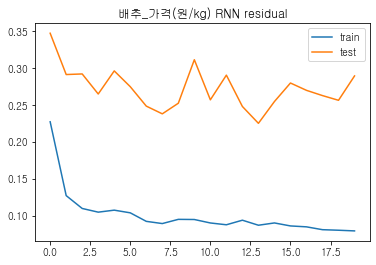

Epoch 1/20
35/35 [==============================] - 16s 279ms/step - loss: 0.5072 - val_loss: 0.6663
Epoch 2/20
35/35 [==============================] - 9s 250ms/step - loss: 0.2434 - val_loss: 0.4376
Epoch 3/20
35/35 [==============================] - 9s 247ms/step - loss: 0.2166 - val_loss: 0.5626
Epoch 4/20
35/35 [==============================] - 8s 226ms/step - loss: 0.1979 - val_loss: 0.3574
Epoch 5/20
35/35 [==============================] - 9s 247ms/step - loss: 0.1978 - val_loss: 0.3796
Epoch 6/20
35/35 [==============================] - 8s 236ms/step - loss: 0.1792 - val_loss: 0.3594
Epoch 7/20
35/35 [==============================] - 6s 188ms/step - loss: 0.1740 - val_loss: 0.4511
Epoch 8/20
35/35 [==============================] - 6s 177ms/step - loss: 0.1614 - val_loss: 0.2947
Epoch 9/20
35/35 [==============================] - 8s 216ms/step - loss: 0.1533 - val_loss: 0.3092
Epoch 10/20
35/35 [==============================] - 7s 210ms/step - loss: 0.1431 - val_loss: 0.337

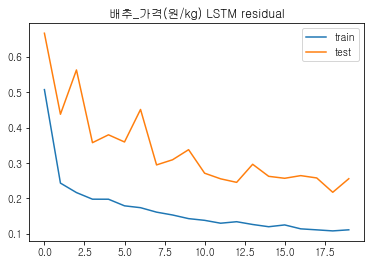

In [8]:
y_RNN_pred = model_RNN(algi)
y_LSTM_pred = model_LSTM(algi)

(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
(1389, 91)
(1389, 90) (1389, 1)
RNN_RMSE :  27705.12106484577
LSTM_RMSE :  24479.024234324603


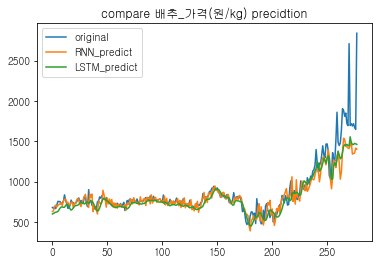

In [9]:
comapare_plot(y_test,y_RNN_pred,y_LSTM_pred)

#### 04-2. 양파 가격

In [10]:
algi = '양파_가격(원/kg)'
train = make_dataset(data,algi,90,1)[0]
target = make_dataset(data,algi,90,1)[1]

#train test 분리
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=False, random_state=120)
print('x_train.shape:',x_train.shape, 'x_train.shape:',y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:',y_test.shape)

#train test reshape
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print('x_train.shape:',x_train.shape, 'x_test.shape:',x_test.shape)

(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
x_train.shape: (1109, 90) x_train.shape: (1109, 1)
x_test.shape: (278, 90) y_test.shape: (278, 1)
x_train.shape: (1109, 90, 1) x_test.shape: (278, 90, 1)


Epoch 1/20
35/35 [==============================] - 7s 124ms/step - loss: 0.3391 - val_loss: 0.1936
Epoch 2/20
35/35 [==============================] - 3s 93ms/step - loss: 0.0674 - val_loss: 0.1281
Epoch 3/20
35/35 [==============================] - 3s 85ms/step - loss: 0.0474 - val_loss: 0.1138
Epoch 4/20
35/35 [==============================] - 4s 104ms/step - loss: 0.0392 - val_loss: 0.1073
Epoch 5/20
35/35 [==============================] - 4s 106ms/step - loss: 0.0360 - val_loss: 0.1059
Epoch 6/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0358 - val_loss: 0.1027
Epoch 7/20
35/35 [==============================] - 4s 112ms/step - loss: 0.0318 - val_loss: 0.1050
Epoch 8/20
35/35 [==============================] - 3s 98ms/step - loss: 0.0312 - val_loss: 0.0985
Epoch 9/20
35/35 [==============================] - 3s 82ms/step - loss: 0.0317 - val_loss: 0.1020
Epoch 10/20
35/35 [==============================] - 3s 80ms/step - loss: 0.0295 - val_loss: 0.1000
Epoc

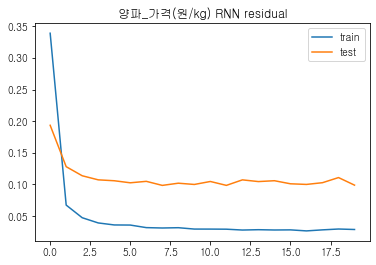

Epoch 1/20
35/35 [==============================] - 11s 166ms/step - loss: 0.3559 - val_loss: 0.3292
Epoch 2/20
35/35 [==============================] - 4s 116ms/step - loss: 0.1803 - val_loss: 0.2006
Epoch 3/20
35/35 [==============================] - 4s 115ms/step - loss: 0.1415 - val_loss: 0.1925
Epoch 4/20
35/35 [==============================] - 4s 123ms/step - loss: 0.1198 - val_loss: 0.1795
Epoch 5/20
35/35 [==============================] - 4s 116ms/step - loss: 0.0954 - val_loss: 0.1691
Epoch 6/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0820 - val_loss: 0.1692
Epoch 7/20
35/35 [==============================] - 4s 119ms/step - loss: 0.0711 - val_loss: 0.1729
Epoch 8/20
35/35 [==============================] - 4s 123ms/step - loss: 0.0692 - val_loss: 0.1697
Epoch 9/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0640 - val_loss: 0.1666
Epoch 10/20
35/35 [==============================] - 4s 127ms/step - loss: 0.0621 - val_loss: 0.156

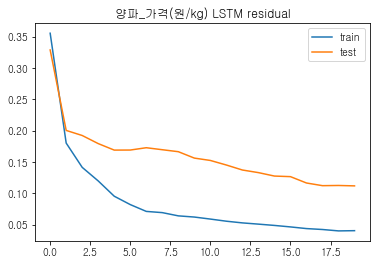

In [11]:
y_RNN_pred = model_RNN(algi)
y_LSTM_pred = model_LSTM(algi)

(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
(1387, 91)
(1387, 90) (1387, 1)
RNN_RMSE :  6494.555711064076
LSTM_RMSE :  7348.4331672066955


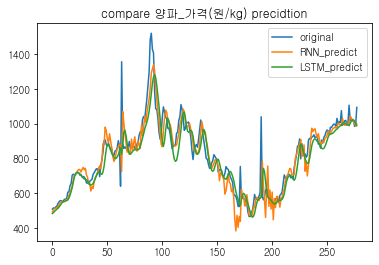

In [12]:
comapare_plot(y_test,y_RNN_pred,y_LSTM_pred)

#### 04-3. 새송이 가격

In [13]:
algi = '새송이_가격(원/kg)'
train = make_dataset(data,algi,90,1)[0]
target = make_dataset(data,algi,90,1)[1]

#train test 분리
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=False, random_state=120)
print('x_train.shape:',x_train.shape, 'x_train.shape:',y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:',y_test.shape)

#train test reshape
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print('x_train.shape:',x_train.shape, 'x_test.shape:',x_test.shape)

(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
x_train.shape: (1107, 90) x_train.shape: (1107, 1)
x_test.shape: (277, 90) y_test.shape: (277, 1)
x_train.shape: (1107, 90, 1) x_test.shape: (277, 90, 1)


Epoch 1/20
35/35 [==============================] - 5s 79ms/step - loss: 0.3102 - val_loss: 0.1997
Epoch 2/20
35/35 [==============================] - 3s 75ms/step - loss: 0.1523 - val_loss: 0.1410
Epoch 3/20
35/35 [==============================] - 2s 62ms/step - loss: 0.1209 - val_loss: 0.1398
Epoch 4/20
35/35 [==============================] - 2s 61ms/step - loss: 0.1126 - val_loss: 0.1440
Epoch 5/20
35/35 [==============================] - 2s 71ms/step - loss: 0.1039 - val_loss: 0.1329
Epoch 6/20
35/35 [==============================] - 2s 65ms/step - loss: 0.0969 - val_loss: 0.1237
Epoch 7/20
35/35 [==============================] - 3s 73ms/step - loss: 0.0990 - val_loss: 0.1205
Epoch 8/20
35/35 [==============================] - 2s 65ms/step - loss: 0.0902 - val_loss: 0.1212
Epoch 9/20
35/35 [==============================] - 2s 68ms/step - loss: 0.0903 - val_loss: 0.1266
Epoch 10/20
35/35 [==============================] - 3s 73ms/step - loss: 0.0893 - val_loss: 0.1317
Epoch 11/

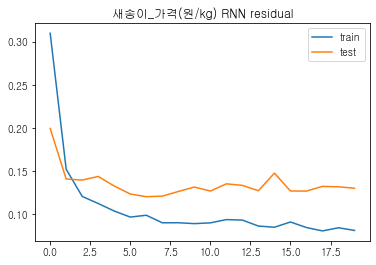

Epoch 1/20
35/35 [==============================] - 11s 153ms/step - loss: 0.6504 - val_loss: 0.5513
Epoch 2/20
35/35 [==============================] - 4s 116ms/step - loss: 0.3785 - val_loss: 0.4307
Epoch 3/20
35/35 [==============================] - 4s 125ms/step - loss: 0.2629 - val_loss: 0.3169
Epoch 4/20
35/35 [==============================] - 5s 147ms/step - loss: 0.2146 - val_loss: 0.2576
Epoch 5/20
35/35 [==============================] - 5s 138ms/step - loss: 0.1854 - val_loss: 0.1843
Epoch 6/20
35/35 [==============================] - 5s 131ms/step - loss: 0.1740 - val_loss: 0.2513
Epoch 7/20
35/35 [==============================] - 5s 131ms/step - loss: 0.1687 - val_loss: 0.1783
Epoch 8/20
35/35 [==============================] - 4s 128ms/step - loss: 0.1453 - val_loss: 0.1385
Epoch 9/20
35/35 [==============================] - 4s 127ms/step - loss: 0.1266 - val_loss: 0.1331
Epoch 10/20
35/35 [==============================] - 4s 127ms/step - loss: 0.1237 - val_loss: 0.117

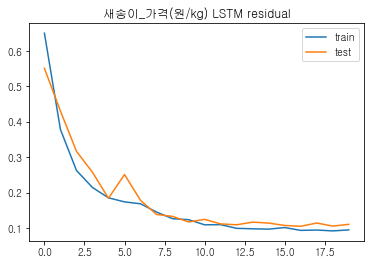

In [14]:
y_RNN_pred = model_RNN(algi)
y_LSTM_pred = model_LSTM(algi)

(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
(1384, 91)
(1384, 90) (1384, 1)
RNN_RMSE :  17712.61013299646
LSTM_RMSE :  15029.9960694663


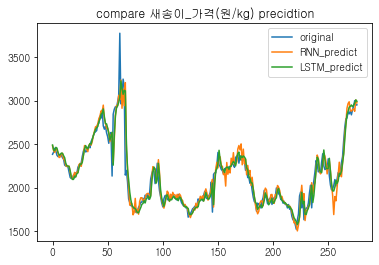

In [15]:
comapare_plot(y_test,y_RNN_pred,y_LSTM_pred)

#### 04-4. 건고추 가격

In [16]:
algi = '건고추_가격(원/kg)'
train = make_dataset(data,algi,90,1)[0]
target = make_dataset(data,algi,90,1)[1]

#train test 분리
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=False, random_state=120)
print('x_train.shape:',x_train.shape, 'x_train.shape:',y_train.shape)
print('x_test.shape:', x_test.shape, 'y_test.shape:',y_test.shape)

#train test reshape
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print('x_train.shape:',x_train.shape, 'x_test.shape:',x_test.shape)

(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
x_train.shape: (1094, 90) x_train.shape: (1094, 1)
x_test.shape: (274, 90) y_test.shape: (274, 1)
x_train.shape: (1094, 90, 1) x_test.shape: (274, 90, 1)


Epoch 1/20
35/35 [==============================] - 5s 68ms/step - loss: 0.5765 - val_loss: 2.5956
Epoch 2/20
35/35 [==============================] - 2s 66ms/step - loss: 0.4616 - val_loss: 2.6039
Epoch 3/20
35/35 [==============================] - 2s 59ms/step - loss: 0.4503 - val_loss: 2.5537
Epoch 4/20
35/35 [==============================] - 2s 62ms/step - loss: 0.4242 - val_loss: 2.5754
Epoch 5/20
35/35 [==============================] - 2s 58ms/step - loss: 0.4106 - val_loss: 2.5770
Epoch 6/20
35/35 [==============================] - 2s 66ms/step - loss: 0.4107 - val_loss: 2.6121
Epoch 7/20
35/35 [==============================] - 2s 66ms/step - loss: 0.4212 - val_loss: 2.5711
Epoch 8/20
35/35 [==============================] - 2s 64ms/step - loss: 0.3917 - val_loss: 2.5788
Epoch 9/20
35/35 [==============================] - 2s 64ms/step - loss: 0.3824 - val_loss: 2.6096
Epoch 10/20
35/35 [==============================] - 2s 68ms/step - loss: 0.3716 - val_loss: 2.5673
Epoch 11/

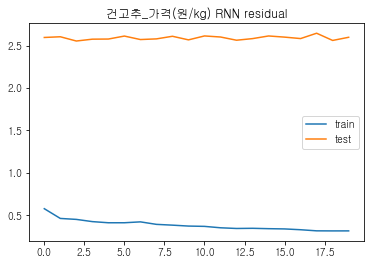

Epoch 1/20
35/35 [==============================] - 10s 160ms/step - loss: 0.4754 - val_loss: 2.4892
Epoch 2/20
35/35 [==============================] - 5s 133ms/step - loss: 0.4598 - val_loss: 2.5453
Epoch 3/20
35/35 [==============================] - 5s 142ms/step - loss: 0.4539 - val_loss: 2.4632
Epoch 4/20
35/35 [==============================] - 5s 141ms/step - loss: 0.4518 - val_loss: 2.4563
Epoch 5/20
35/35 [==============================] - 5s 146ms/step - loss: 0.4549 - val_loss: 2.4491
Epoch 6/20
35/35 [==============================] - 5s 152ms/step - loss: 0.4506 - val_loss: 2.4781
Epoch 7/20
35/35 [==============================] - 5s 143ms/step - loss: 0.4483 - val_loss: 2.5181
Epoch 8/20
35/35 [==============================] - 5s 150ms/step - loss: 0.4495 - val_loss: 2.5372
Epoch 9/20
35/35 [==============================] - 5s 138ms/step - loss: 0.4477 - val_loss: 2.5663
Epoch 10/20
35/35 [==============================] - 5s 131ms/step - loss: 0.4439 - val_loss: 2.554

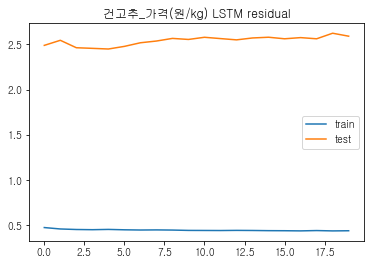

In [17]:
y_RNN_pred = model_RNN(algi)
y_LSTM_pred = model_LSTM(algi)

(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
(1368, 91)
(1368, 90) (1368, 1)
RNN_RMSE :  183603683.65151113
LSTM_RMSE :  183108975.17352867


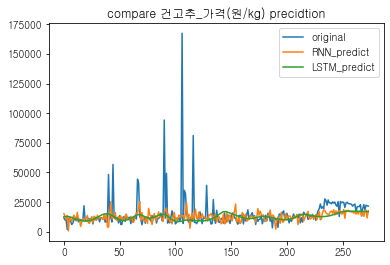

In [18]:
comapare_plot(y_test,y_RNN_pred,y_LSTM_pred)

### 06. 최종 결과

시계열 분석할 작물을 선택
원예적 특성과 시계열 클러스터링, 수요와 공급의 관계를 고려해 4개의 작물 선택

4개의 작물에 각각 심층 RNN과 LSTM을 적용해 예측 및 잔차 분석

1. 배추
+ 공급 < 수요 -> 가격 상승

<잔차>
+ RNN : 0.257
+ LSTM : 0.232
> LSTM의 잔차가 확실히 감소

<예측 그래프>
+  RNN : 원본 데이터를 따라가지만 전반적으로 큰 오차가 존재
+  LSTM : 원본 데이터를 따라가는 완만한 예측
> 후반의 급격한 가격상승을 제대로 예측하지 못했지만 train 데이터의 기간을 늘려 해결가능


2. 양파
+ 공급 > 수요 -> 가격 하락

<잔차>
+ RNN : 0.0983
+ LSTM : 0.0115
> RNN의 잔차가 더 작다
 
<예측 그래프>
+  RNN : 원본 데이터를 따라가지만 전반적으로 큰 오차가 존재 & 급상승하는 가격을 잘 예측 
+  LSTM : 원본 데이터를 따라가는 완만한 예측
> 기간을 늘려 예측할 필요 존재

3. 새송이
+ 공급 = 수요 -> 가격 안정

<잔차>
+ RNN : 0.1182
+ LSTM : 0.1172 , 잔차가 이상적으로 감소
> 잔차가 비슷
 
<예측 그래프>
+ RNN : 상승하는 가격을 잘 예측
+ LSTM : 하강하는 가격을 잘 예측

4. 건고추
+ 예외 : 수입의 영향이 더 크다
+ 수입

<잔차>
+ RNN : 2.723
+ LSTM : 2.605
 
<예측 그래프>
+ RNN : 완만하지 않은 그래프
+ LSTM : 상대적으로 완만한 그래프
> 수입의 영향을 가장 많이 받는 작물이라 단변량(가격) 예측에 적합하지 않음
